$y(x) = Ax^2 + Bx + C$

$y(0) = C = u$

$y(1) = A + B + C = v$

Case 1: $y'(0) = B + C = w$

Case 2: $y'(1) = 2A + B + C = w$

0.0011157738618996764 29.6978945312089


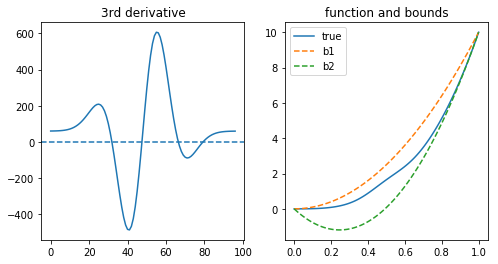

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def fit2constr(y, dx):
    u = y[0]
    v = y[-1]
    w1 = (y[1] - y[0]) / dx
    w2 = (y[-1] - y[-2]) / dx
    
    print(w1, w2)
    
    M1 = np.array([
      [0, 0, 1],
      [1, 1, 1],
      [0, 1, 0]
    ])
    
    M2 = np.array([
      [0, 0, 1],
      [1, 1, 1],
      [2, 1, 0]
    ])
    
    b1 = np.linalg.solve(M1, np.array([u, v, w1]))
    b2 = np.linalg.solve(M2, np.array([u, v, w2]))
    return b1, b2

def plotbounds(x,y,b1,b2,dx):
    y1 = (x**2) * b1[0] + x * b1[1] + b1[2]
    y2 = (x**2) * b2[0] + x * b2[1] + b2[2]
    
    DY3 = (y[3:] -3*y[2:-1] +3*y[1:-2] -y[:-3]) / dx**3
    
    fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
    ax[0].plot(DY3)
    ax[0].axhline(y=0, linestyle='--')
    ax[0].set_title('3rd derivative')
    
    ax[1].set_title('function and bounds')
    ax[1].plot(x,y,label='true')
    ax[1].plot(x,y1, '--', label='b1')
    ax[1].plot(x,y2, '--',label='b2')
    ax[1].legend()
    plt.show()
    
gau =  lambda mu, s2: np.exp(-mu**2/2/s2) / np.sqrt(2*np.pi*s2)
    
x = np.linspace(0,1,100)
dx = x[1] - x[0]
y = 0.1*gau(x-0.5, 0.01) + 10*x**3
# y += 0.001*gau(x-0.5, 0.001)
# y = np.exp(10*x)
b1, b2 = fit2constr(y, dx)
plotbounds(x,y,b1,b2,dx)